In [1]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv")

In [3]:
titanic.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch
0,1,1st,survived,female,29.0000,0,0
1,2,1st,survived,male,0.9167,1,2
2,3,1st,died,female,2.0000,1,2
3,4,1st,died,male,30.0000,1,2
4,5,1st,died,female,25.0000,1,2


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null object
sex           1309 non-null object
age           1309 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.7+ KB


In [20]:
titanic.iloc[[1]]

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch
1,2,1st,survived,male,0.9167,1,2


In [25]:
titanic_df=titanic.drop('Unnamed: 0',1)

In [28]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch
0,1st,survived,female,29.0000,0,0
1,1st,survived,male,0.9167,1,2
2,1st,died,female,2.0000,1,2
3,1st,died,male,30.0000,1,2
4,1st,died,female,25.0000,1,2


In [34]:
msk = np.random.rand(len(titanic_df)) < 0.8

In [35]:
train_data=titanic_df.loc[msk]
test_data=titanic_df.loc[~msk]

In [40]:
print "the number of training data:",len(train_data)
print "the number of test data:",len(test_data)


the number of training data: 1055
the number of test data: 254


In [42]:
#firstly,let's check how the ages are distrivuted in this Data set!
import matplotlib.pyplot as plt
from numpy.random import normal
%matplotlib inline
total_people_ages=titanic_df[titanic_df['age']<=100]['age']

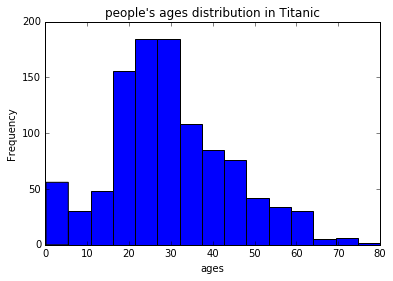

In [45]:
plt.hist(total_people_ages,bins=15)
plt.title("people's ages distribution in Titanic")
plt.xlabel("ages")
plt.ylabel("Frequency")
plt.show()

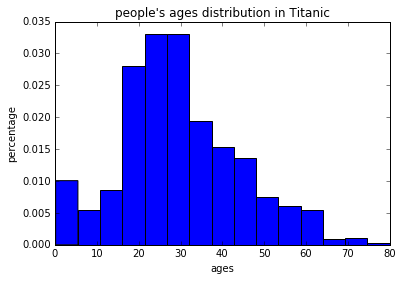

In [46]:
plt.hist(total_people_ages,bins=15,normed=True)
plt.title("people's ages distribution in Titanic")
plt.xlabel("ages")
plt.ylabel("percentage")
plt.show()